# 10/22/2015

# Beginning Analysis of Red Disk Fraction over Redshift, starting by using Tom's selection Method


# Section 1: Cross-matching with ULTRAVISTA catalog
## ULTRAVISTA provides k-corrected colors and magnitudes for 339,384 galaxies in the COSMOS field. GZ:Hubble classified 84,350 galaxies in the COSMOS field. Of these, 70,198 were sky-matched in the ULTRAVista catalog (with a max. separation of 1"). 

## link to ULTRAVista data: http://terapix.iap.fr/article.php?id_article=844

## A note: in Tom's work, he claims that 26,452 of these are within a redshift range 0.2 <= z <= 1.0, however I find 51,370 in this range (see below). I'm not sure which z measurement he's going with though - I'm using the 'Z' parameter as described in Griffith's et al. (spec z unless bad, then photoz). 

In [140]:
%pylab inline
import matplotlib.gridspec as gridspec
import scipy.stats.distributions as dist

from astropy.io import fits as pyfits
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma
mpl.rcParams['text.usetex']=True


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
data = pyfits.open('/home/mel/Documents/GZ_HUBBLE/other_catalogs/ULTRAVISTA/matched_catalog.fits')
data=data[1].data

In [3]:
data_2_1 = (data['Z']>=0.2) & (data['Z']<=1.0) 
print 'The number of galaxies in COSMOS between $0.2 < z < 1.0$ is %s'%len(data[data_2_1])


The number of galaxies in COSMOS between $0.2 < z < 1.0$ is 51370


# Section 2: Removing Dusty Galaxies
# Galaxies so far (UV + GZH + 0.2 < z < 1.0): 51,370
## a note: the NUV-MR column in the UV table is a lie...somehow? physically subtracting the MR from NUV column gives the correct values. 

In [4]:
correctable_data=(data['Correctable_Category']=='correctable')

In [5]:
data_2_4 = (data['Z']>=0.2) & (data['Z']<=.4)# & (data['t01_smooth_or_features_a02_features_or_disk_debiased_fraction']>=.8)
data_4_6 = (data['Z']>0.4) & (data['Z']<=.6) #& (data['t01_smooth_or_features_a02_features_or_disk_debiased_fraction']>=.8)
data_6_8 = (data['Z']>0.6) & (data['Z']<=.8) #& (data['t01_smooth_or_features_a02_features_or_disk_debiased_fraction']>=.8)
data_8_1 = (data['Z']>0.8) & (data['Z']<=1) #& (data['t01_smooth_or_features_a02_features_or_disk_debiased_fraction']>=.8)


In [6]:
data_2_4_red = (data['Z']>=0.2) & (data['Z']<=.4) & (data['MNUV']-data['MR']>4) & (data['MNUV']-data['MR']<(1.6+2.2*(data['MR']-data['MJ'])))
data_4_6_red = (data['Z']>0.4) & (data['Z']<=.6) & (data['MNUV']-data['MR']>4) & (data['MNUV']-data['MR']<1.6+2.2*(data['MR']-data['MJ']))
data_6_8_red = (data['Z']>0.6) & (data['Z']<=.8) & (data['MNUV']-data['MR']>4) & (data['MNUV']-data['MR']<1.6+2.2*(data['MR']-data['MJ']))
data_8_1_red = (data['Z']>0.8) & (data['Z']<=1) & (data['MNUV']-data['MR']>4) & (data['MNUV']-data['MR']<1.6+2.2*(data['MR']-data['MJ']))

The number of galaxies after removing dusty galaxies is 50462


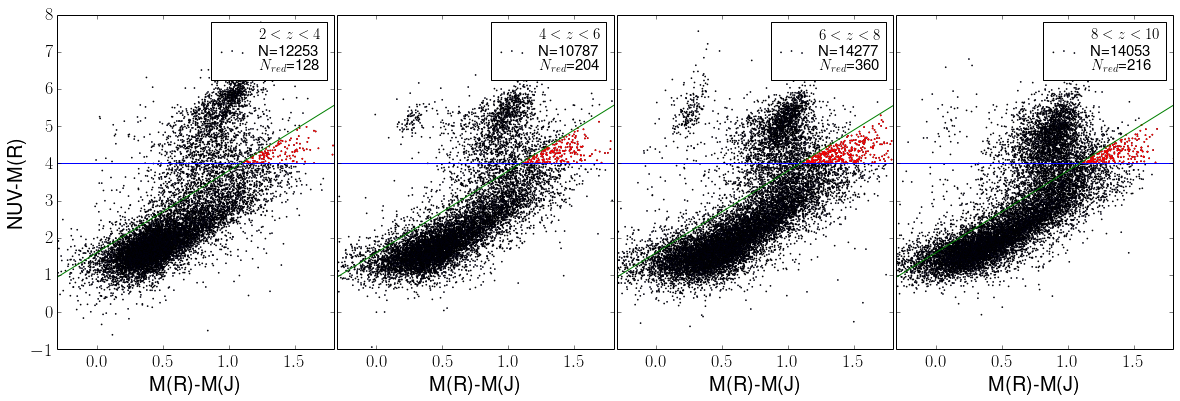

In [7]:
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18 

f=plt.figure(figsize=(20,6))
gs=gridspec.GridSpec(1,4)
gs.update(wspace=.01)

data_list=[data_2_4,data_4_6,data_6_8,data_8_1]
data_list_red=[data_2_4_red,data_4_6_red,data_6_8_red,data_8_1_red]

labellist=[2,4,6,8]

x=np.linspace(-1,2,10)
for i in range(0,4):
    ax=plt.subplot(gs[0,i])
    plt.scatter(data[data_list[i]]['MR']-data[data_list[i]]['MJ'],data[data_list[i]]['MNUV']-data[data_list[i]]['MR'],s=.5,label='$%s<z<%s$\nN=%s\n$N_{red}$=%s'%(labellist[i],labellist[i]+2,len(data[data_list[i]]),len(data[data_list_red[i]])))
    plt.scatter(data[data_list_red[i]]['MR']-data[data_list_red[i]]['MJ'],data[data_list_red[i]]['MNUV']-data[data_list_red[i]]['MR'],s=.5,color='r')

    if i!=0:
        plt.tick_params(labelleft='off')
    plt.xlim(-.3,1.8)
    plt.ylim(-1,8)
    plt.xlabel('M(R)-M(J)',fontsize=20)
    if i==0:
        plt.ylabel('NUV-M(R)',fontsize=20)
    plt.legend(numpoints=1,fontsize=15)
    plt.plot(x,4+0*x)
    plt.plot(x,1.6+2.2*x)



In [59]:
red_cut = (data['MNUV']-data['MR']<4) | (data['MNUV']-data['MR']>(1.6+2.2*(data['MR']-data['MJ'])))

data_2_1_red = (data['Z']>=0.2) & (data['Z']<=1) & red_cut
print 'The number of galaxies after removing dusty galaxies is %s' %len(data[data_2_1_red])

The number of galaxies after removing dusty galaxies is 50460


# Section 3a - Surface Brightness Cut 
## I'm not sure exactly what the best route is here; Tom used an absolute magnitude cut (variable with redshift), while Claudia suggests a surface brightness cut. For now, I'm just going to go with a mostly-arbitrary SB cut of mu < 23 (dashed line below). For now... 

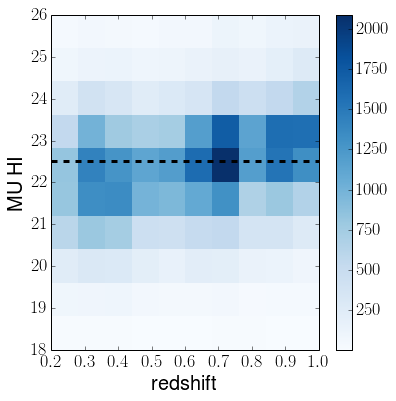

In [8]:
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18 

f=plt.figure(figsize=(6,6))
gs=gridspec.GridSpec(1,1)

ax=plt.subplot(gs[0,0])
hist,xedges,yedges=np.histogram2d(data[data_2_1]['Z'],data[data_2_1]['MU_HI'],range=((.2,1),(18,26)))
extent=[xedges[0],xedges[-1],yedges[0],yedges[-1]]
plt.imshow(hist.T,origin='lower',interpolation='nearest',extent=extent,aspect='auto',cmap=cm.Blues)
plt.colorbar()
plt.axhline(y=22.5,ls='dashed',color='k',lw=3)
plt.xlabel('redshift',fontsize=20)
plt.ylabel('MU~HI',fontsize=20)


In [24]:
SB_cut = 23
new_sample = (data['Z']>=0.2) & (data['Z']<=1) & ((data['MNUV']-data['MR']<4) | (data['MNUV']-data['MR']>(1.6+2.2*(data['MR']-data['MJ'])))) & (data['MU_HI']<SB_cut)
print 'Galaxies remaining after applying surface brightness cut: %s'%len(data[new_sample])

Galaxies remaining after applying surface brightness cut: 34769


# Section 3b - Magnitude cut (using Tom's method)
## Plot Mr vs z, find separation between where features are no longer detectable

In [16]:
def zHist3D(xedges,yedges,the_data,colorhist,p):
    newmatrix = np.zeros(shape=(len(yedges)-1,len(xedges)-1))
    for i in range(0,len(yedges)-1):
        for j in range(0,len(xedges)-1):
            data_i_j = (the_data['MR']>=yedges[i]) & (the_data['MR'] < yedges[i+1]) & (the_data['Z']>=xedges[j]) & (the_data['Z']<xedges[j+1])
            newmatrix[i,j]=np.nanmean(the_data[data_i_j][p])
    newmatrix=ma.masked_where(colorhist.T<50,newmatrix)
    return newmatrix

In [20]:
maghist,xedges,yedges = np.histogram2d(data['Z'],data['MR'],range=((.1,1.1),(-25,-13)),bins=(10,15))
extent=[xedges[0],xedges[-1],yedges[0],yedges[-1]]
this_hist_weighted=zHist3D(xedges,yedges,data,maghist,'t01_smooth_or_features_a02_features_or_disk_weighted_fraction')
this_hist_debiased=zHist3D(xedges,yedges,data[correctable_data],maghist,'t01_smooth_or_features_a02_features_or_disk_debiased_fraction')
this_hist_best=zHist3D(xedges,yedges,data,maghist,'t01_smooth_or_features_a02_features_or_disk_best_fraction')

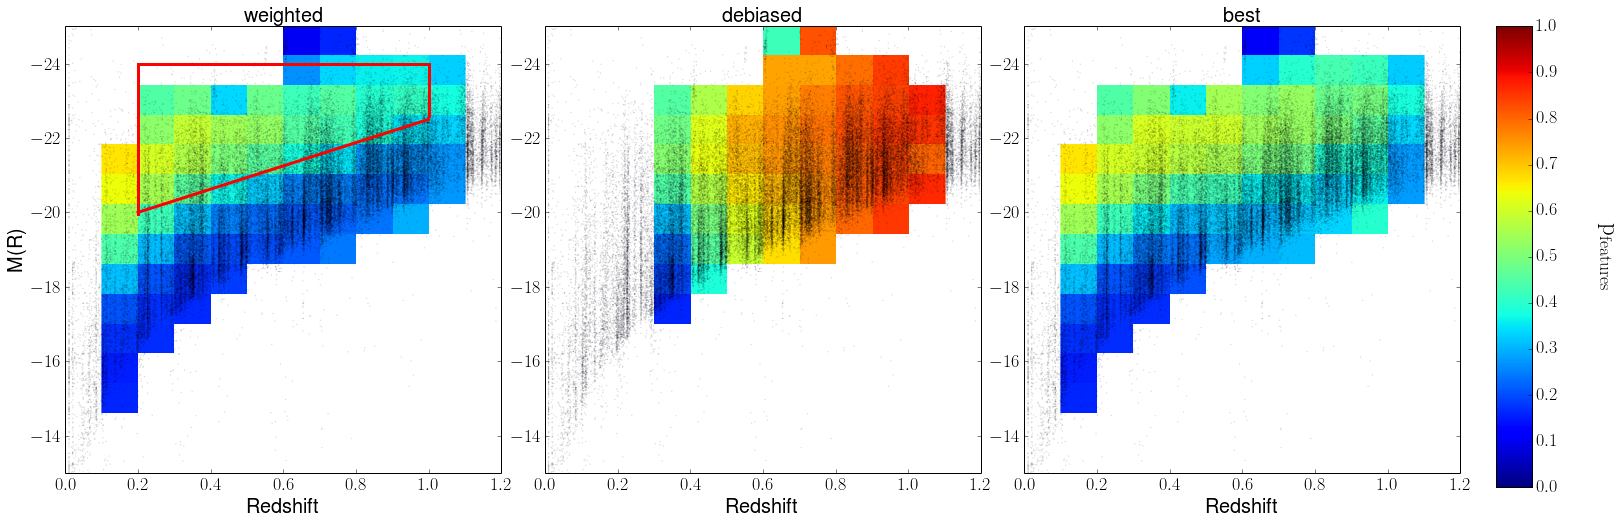

In [24]:
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18 

cmap=cm.jet

f=plt.figure(figsize=(25,8))
gs=gridspec.GridSpec(1,3)
gs.update(wspace=.1,hspace=0)

ax1=plt.subplot(gs[0,0])
plt.scatter(data['Z'],data['MR'],s=.1,alpha=.2)
plt.imshow(this_hist_weighted,origin='lower',extent=extent,interpolation='nearest',vmin=0,vmax=1,aspect='auto',cmap=cmap) 
x=np.linspace(.2,1,10)
plt.plot(x,-19.375-3.125*x,c='r',lw=3)
plt.plot(x,-24-0*x,c='r',lw=3)
ymax=-19.375-3.125*.2
plt.axvline(x=.2,ymin=.58,ymax=.91,lw=3,c='r')
plt.axvline(x=1,ymin=.8,ymax=.91,lw=3,c='r')


plt.xlim(0,1.2)
plt.ylim(-25,-13)
plt.xlabel('Redshift',fontsize=20)
plt.ylabel('M(R)',fontsize=20)
plt.title('weighted',fontsize=20)
plt.gca().invert_yaxis()

ax2=plt.subplot(gs[0,1])
plt.scatter(data['Z'],data['MR'],s=.1,alpha=.2)
plt.imshow(this_hist_debiased,origin='lower',extent=extent,interpolation='nearest',vmin=0,vmax=1,aspect='auto',cmap=cmap) 
plt.xlim(0,1.2)
plt.ylim(-25,-13)
plt.xlabel('Redshift',fontsize=20)
plt.title('debiased',fontsize=20)
plt.gca().invert_yaxis()

ax3=plt.subplot(gs[0,2])
plt.scatter(data['Z'],data['MR'],s=.1,alpha=.2)
im=plt.imshow(this_hist_best,origin='lower',extent=extent,interpolation='nearest',vmin=0,vmax=1,aspect='auto',cmap=cmap) 
plt.xlim(0,1.2)
plt.ylim(-25,-13)
plt.xlabel('Redshift',fontsize=20)
plt.title('best',fontsize=20)
plt.gca().invert_yaxis()

cbar_ax = f.add_axes([0.92, 0.1, 0.02, 0.8])
f.colorbar(im, cax=cbar_ax)
f.text(0.98, 0.5, r'$\mathrm{p_{features}}$', ha='center', va='center', rotation=270,fontsize=25)

In [62]:
#Define magnitude cut:
mag_cut = (data['MR'] < -19.375-3.125*data['Z'] ) & (data['MR']>-24)

In [74]:
new_sample_mag_limited = (data['Z']>=.2) & (data['Z']<.4) & red_cut & mag_cut
print 'Galaxies remaining after applying evolving magnitude cut: %s'%len(data[new_sample_mag_limited])

Galaxies remaining after applying evolving magnitude cut: 2738


# Section 4: Selecting Red Sequence 
## After removing dusty galaxies and applying an evolving magnitude cut, we have a sample of 10,878 galaxies. Now we need to separate them into blue cloud, red sequence, and intermediate / green valley. 

In [75]:
#separate data into bins of fixed redshift, of width dz 
z_min=.2
z_max=1
dz=.2
z_edges=np.linspace(z_min,z_max,(z_max-z_min)/dz+1)
redshift_bin_dct={}
for z in range(0,len(z_edges)-1):
    redshift_bin_dct[z_edges[z],z_edges[z+1]] = (data['Z']>=float(z_edges[z])) & (data['Z']<float(z_edges[z+1])) & mag_cut & red_cut

In [76]:
t=0
for z in range(0,len(z_edges)-1):
    print 'the number of galaxies between redshift %s and %s is %s' %(z_edges[z],z_edges[z+1],len(data[redshift_bin_dct[z_edges[z],z_edges[z+1]]]))
    t+=len(data[redshift_bin_dct[z_edges[z],z_edges[z+1]]])
print 'total is %s'%t

the number of galaxies between redshift 0.2 and 0.4 is 2738
the number of galaxies between redshift 0.4 and 0.6 is 2471
the number of galaxies between redshift 0.6 and 0.8 is 2830
the number of galaxies between redshift 0.8 and 1.0 is 2828
total is 10867


In [82]:
data_list=[]
for z in range(0,len(z_edges)-1):
    data_list.append(redshift_bin_dct[z_edges[z],z_edges[z+1]])

In [90]:
def Hist3D(xedges,yedges,the_data,colorhist):
    newmatrix = np.zeros(shape=(len(yedges)-1,len(xedges)-1))
    for i in range(0,len(yedges)-1):
        for j in range(0,len(xedges)-1):
            data_i_j = (the_data['MNUV']-the_data['MR']>=yedges[i]) & (the_data['MNUV']-the_data['MR'] < yedges[i+1]) & (the_data['MR']>=xedges[j]) & (the_data['MR']<xedges[j+1])
            newmatrix[i,j]=np.average(the_data[data_i_j]['t01_smooth_or_features_a02_features_or_disk_best_fraction'])
    newmatrix=ma.masked_where(colorhist.T<20,newmatrix)
    return newmatrix

In [91]:
colorhist0,xedges,yedges = np.histogram2d(data[data_list[0]]['MR'],data[data_list[0]]['MNUV']-data[data_list[0]]['MR'],range=((-30,-15),(-1,8)),bins=(20,20))
extent=[xedges[0],xedges[-1],yedges[0],yedges[-1]]
this_hist0=Hist3D(xedges,yedges,data[data_list[0]],colorhist0)

colorhist1,xedges,yedges = np.histogram2d(data[data_list[1]]['MR'],data[data_list[1]]['MNUV']-data[data_list[1]]['MR'],range=((-30,-15),(-1,8)),bins=(20,20))
extent=[xedges[0],xedges[-1],yedges[0],yedges[-1]]
this_hist1=Hist3D(xedges,yedges,data[data_list[1]],colorhist1)

colorhist2,xedges,yedges = np.histogram2d(data[data_list[2]]['MR'],data[data_list[2]]['MNUV']-data[data_list[2]]['MR'],range=((-30,-15),(-1,8)),bins=(20,20))
extent=[xedges[0],xedges[-1],yedges[0],yedges[-1]]
this_hist2=Hist3D(xedges,yedges,data[data_list[2]],colorhist2)

colorhist3,xedges,yedges = np.histogram2d(data[data_list[3]]['MR'],data[data_list[3]]['MNUV']-data[data_list[3]]['MR'],range=((-30,-15),(-1,8)),bins=(20,20))
extent=[xedges[0],xedges[-1],yedges[0],yedges[-1]]
this_hist3=Hist3D(xedges,yedges,data[data_list[3]],colorhist3)

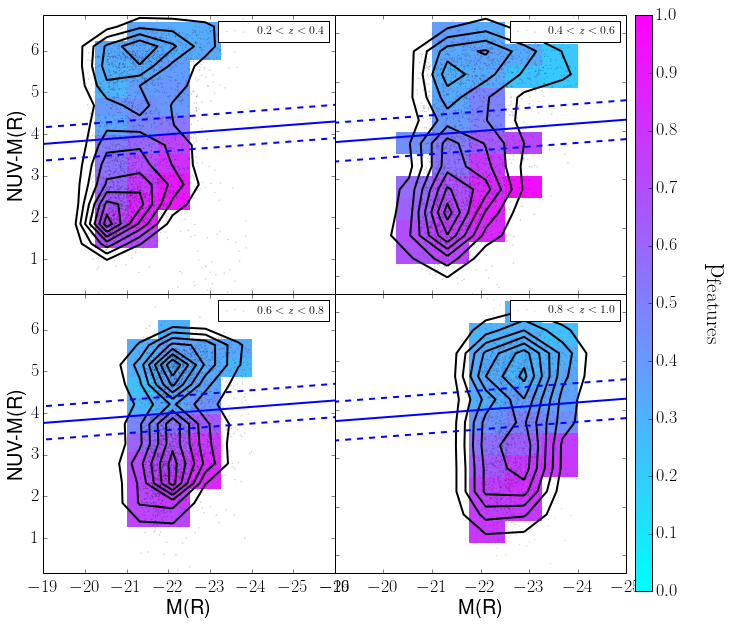

In [94]:
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18 

f=plt.figure(figsize=(12,10))
gs=gridspec.GridSpec(2,2)
gs.update(wspace=0,hspace=0)

cmap=cm.cool
alpha=.3

gsx=[0,0,1,1]
gsy=[0,1,0,1]
labellist=[2,4,6,8]

x=np.linspace(-40,-10,10)
ax0=plt.subplot(gs[0,0])
plt.scatter(data[data_list[0]]['MR'],data[data_list[0]]['MNUV']-data[data_list[0]]['MR'],s=.1,alpha=alpha,label='$0.2<z<0.4$')
plt.contour(colorhist0.T,extent=extent,colors='k',linewidths=2)
im0=ax0.imshow(this_hist0,origin='lower',extent=extent,interpolation='nearest',cmap=cmap,vmin=0,vmax=1)
plt.plot(x,2.3-.077*x,lw=2)    
plt.plot(x,1.9-.077*x,lw=2,ls='dashed',c='b')    
plt.plot(x,2.7-.077*x,lw=2,ls='dashed',c='b')    
plt.ylim(-1,8)
plt.xlim(-26,-19)
plt.tick_params(labelbottom='off')
plt.ylabel('NUV-M(R)',fontsize=20)
plt.legend()
plt.gca().invert_xaxis()

ax1=plt.subplot(gs[0,1])
plt.scatter(data[data_list[1]]['MR'],data[data_list[1]]['MNUV']-data[data_list[1]]['MR'],s=.1,alpha=alpha,label='$0.4<z<0.6$')
plt.contour(colorhist1.T,extent=extent,colors='k',linewidths=2)
im1=ax1.imshow(this_hist1,origin='lower',extent=extent,interpolation='nearest',cmap=cmap,vmin=0,vmax=1)
plt.tick_params(labelleft='off',labelbottom='off')
plt.plot(x,2.3-.077*x,lw=2)    
plt.plot(x,1.9-.077*x,lw=2,ls='dashed',c='b')    
plt.plot(x,2.7-.077*x,lw=2,ls='dashed',c='b')    
plt.ylim(-1,8)
plt.xlim(-26,-19)
plt.gca().invert_xaxis()
plt.legend()

ax2=plt.subplot(gs[1,0],sharex=ax0)
plt.scatter(data[data_list[2]]['MR'],data[data_list[2]]['MNUV']-data[data_list[2]]['MR'],s=.1,alpha=alpha,label='$0.6<z<0.8$')
plt.contour(colorhist2.T,extent=extent,colors='k',linewidths=2)
im2=ax2.imshow(this_hist2,origin='lower',extent=extent,interpolation='nearest',cmap=cmap,vmin=0,vmax=1)
plt.plot(x,2.3-.077*x,lw=2)    
plt.plot(x,1.9-.077*x,lw=2,ls='dashed',c='b')    
plt.plot(x,2.7-.077*x,lw=2,ls='dashed',c='b')    
plt.ylim(-1,8)
plt.xlim(-26,-19)
plt.gca().invert_xaxis()
plt.ylabel('NUV-M(R)',fontsize=20)
plt.xlabel('M(R)',fontsize=20)
plt.legend()

ax3=plt.subplot(gs[1,1],sharex=ax1)
plt.scatter(data[data_list[3]]['MR'],data[data_list[3]]['MNUV']-data[data_list[3]]['MR'],s=.1,alpha=.2,label='$0.8<z<1.0$')
plt.contour(colorhist3.T,extent=extent,colors='k',linewidths=2)
im3=ax3.imshow(this_hist3,origin='lower',extent=extent,interpolation='nearest',cmap=cmap,vmin=0,vmax=1)
plt.tick_params(labelleft='off')

        
plt.plot(x,2.3-.077*x,lw=2)    
plt.plot(x,1.9-.077*x,lw=2,ls='dashed',c='b')    
plt.plot(x,2.7-.077*x,lw=2,ls='dashed',c='b')    
plt.ylim(-1,8)
plt.xlim(-25,-19)
plt.gca().invert_xaxis()
plt.legend()
plt.xlabel('M(R)',fontsize=20)


f.subplots_adjust(wspace=0, hspace=0,right=.8)
cbar_ax = f.add_axes([0.81, 0.1, 0.02, 0.8])
f.colorbar(im0, cax=cbar_ax)
f.text(0.9, 0.5, r'$\mathrm{p_{features}}$', ha='center', va='center', rotation=270,fontsize=30)

In [95]:
red_sequence = (data['Z']>=0.2) & (data['Z']<=1) & red_cut & mag_cut & (data['MNUV']-data['MR']>(2.7-.077*data['MR'])) 
blue_cloud = (data['Z']>=0.2) & (data['Z']<=1) & red_cut & mag_cut & (data['MNUV']-data['MR']<(1.9-.077*data['MR'])) 


In [160]:
disk_cut = (data['t01_smooth_or_features_a02_features_or_disk_best_fraction']>=.8) & correctable_data


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater_equal
  if __name__ == '__main__':


In [161]:
all_disks_dct={}
red_sequence_disks_dct={}
for z in range(0,len(z_edges)-1):
    all_disks_dct[z_edges[z],z_edges[z+1]] = (data['Z']>=float(z_edges[z])) & (data['Z']<float(z_edges[z+1])) & mag_cut & red_cut  & disk_cut
    red_sequence_disks_dct[z_edges[z],z_edges[z+1]] = (data['Z']>=float(z_edges[z])) & (data['Z']<float(z_edges[z+1])) & mag_cut & red_cut & red_sequence & disk_cut


In [162]:
t=0
for z in range(0,len(z_edges)-1):
    print 'the number of disks galaxies between redshift %s and %s is %s' %(z_edges[z],z_edges[z+1],len(data[all_disks_dct[z_edges[z],z_edges[z+1]]]))
    t+=len(data[all_disks_dct[z_edges[z],z_edges[z+1]]])
print 'total is %s'%t

t=0
for z in range(0,len(z_edges)-1):
    print 'the number of red sequence disks between redshift %s and %s is %s' %(z_edges[z],z_edges[z+1],len(data[red_sequence_disks_dct[z_edges[z],z_edges[z+1]]]))
    t+=len(data[red_sequence_disks_dct[z_edges[z],z_edges[z+1]]])
print 'total is %s'%t

the number of disks galaxies between redshift 0.2 and 0.4 is 151
the number of disks galaxies between redshift 0.4 and 0.6 is 253
the number of disks galaxies between redshift 0.6 and 0.8 is 322
the number of disks galaxies between redshift 0.8 and 1.0 is 409
total is 1135
the number of red sequence disks between redshift 0.2 and 0.4 is 11
the number of red sequence disks between redshift 0.4 and 0.6 is 12
the number of red sequence disks between redshift 0.6 and 0.8 is 22
the number of red sequence disks between redshift 0.8 and 1.0 is 57
total is 102


In [108]:
red_list = [.3,.5,.7,.9]

(0, 0.2)

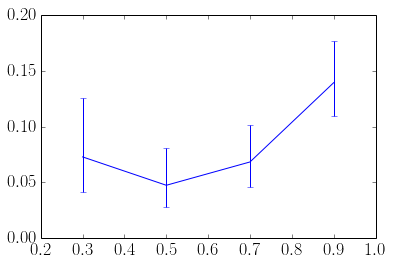

In [163]:
c=.95
frac_list=[]
yerr_low=[]
yerr_hi=[]
for z in range(0,len(z_edges)-1):
    N_all_disks = len(data[all_disks_dct[z_edges[z],z_edges[z+1]]]) #n
    N_red_disks = len(data[red_sequence_disks_dct[z_edges[z],z_edges[z+1]]]) #k
    frac = float(N_red_disks)/N_all_disks
    frac_list.append(frac)
    
    p_l=dist.beta.ppf((1-c)/2.,N_red_disks+1,N_all_disks-N_red_disks+1)
    p_u=dist.beta.ppf(1-(1-c)/2.,N_red_disks+1,N_all_disks-N_red_disks+1)
    yerr_low.append(frac-p_l)
    yerr_hi.append(p_u-frac)
plt.errorbar(red_list,frac_list,yerr=(yerr_low,yerr_hi))
plt.ylim(0,.2)
 #   frac_p_weighted=np.nanmean(data[red_sequence_dct[z_edges[z],z_edges[z+1]]]['t01_smooth_or_features_a02_features_or_disk_weighted_fraction'])
 #   frac_p_best=np.nanmean(data[red_sequence_dct[z_edges[z],z_edges[z+1]]]['t01_smooth_or_features_a02_features_or_disk_best_fraction'])

   # plt.scatter(red_list[z],frac,c='r',s=50)
  #  plt.scatter(red_list[z],frac_p_weighted,c='b',s=50,label='average weighted')
  #  plt.scatter(red_list[z],frac_p_best,c='g',s=50,label='average best')


In [22]:
red_list = [.3,.5,.7,.9]

In [20]:
frac_list = [float(len(data[rs_2_4_disks]))/len(data[all_2_4_disks]),float(len(data[rs_4_6_disks]))/len(data[all_4_6_disks]),float(len(data[rs_6_8_disks]))/len(data[all_6_8_disks]),float(len(data[rs_8_1_disks]))/len(data[all_8_1_disks]),]

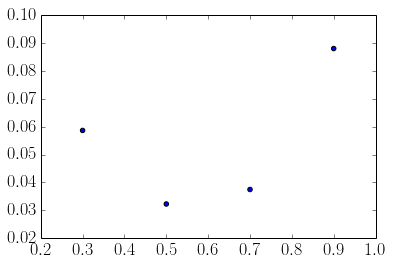

In [23]:
plt.scatter(red_list,frac_list)


In [ ]:
p_l=dist.beta.ppf((1-c)/2.,k+1,n-k+1)
p_u=dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

In [ ]:
import numpy.ma as ma

In [ ]:
plt.hist(new_data[new_new_data]['MU_HI'])